In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import itertools
import statsmodels
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

%matplotlib inline

In [4]:
anwb_df1 = pd.read_csv("./csv_files/TJ_1.csv", on_bad_lines='skip', parse_dates=['jam_start'])
anwb_df2 = pd.read_csv("./csv_files/TJ_2.csv", on_bad_lines='skip', parse_dates=['jam_start'])
anwb_df3 = pd.read_csv("./csv_files/TJ_3.csv", on_bad_lines='skip', parse_dates=['jam_start'])
anwb_df4 = pd.read_csv("./csv_files/TJ_4.csv", on_bad_lines='skip', parse_dates=['jam_start'])
anwb_df5 = pd.read_csv("./csv_files/TJ_5.csv", on_bad_lines='skip', parse_dates=['jam_start'])

anwb_df5.sample(10)

,jam_id,loadDateTimeUTC,road,type,jam_delay,jam_distance,segmentStart,segmentEnd,jam_codeDirection,jam_afrc,...,jam_label,jam_location,jam_reason,jam_road,jam_segmentId,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline
87143,16704306.0,04/03/2022 22:14,A27,a,NaN,NaN,Utrecht,Gorinchem,0.0,0.0,...,closed,NaN,De afrit is dicht. Door opruimwerkzaamheden.,A27,3173.0,NaT,Hagestein,51.99284,5.11142,ugj|Hqle^RNfDz@^Pl@`@X\\h@z@b@x@^t@^v@R^T^RPRL...
527237,17097694.0,25/04/2022 19:54,N388,n,180.0,300.0,Sebaldeburen,Grijpskerk,1.0,3.0,...,NaN,NaN,NaN,N388,5332.0,2022-04-25 19:53:00,Niezijl,53.26410,6.31939,m`|cI_ipe@}Ll@c@@qOViNb@sKr@oOt@mLZyBFe@@kADSD...
401127,17085125.0,23/04/2022 13:59,N235,n,240.0,2500.0,Amsterdam,Purmerend,1.0,3.0,...,NaN,NaN,NaN,N235,3840.0,2022-04-23 13:48:00,Ilpendam,52.46476,4.94896,}ta_Ioze]iRtBoI~@}B\\SBiAFwI`AaDZuD^eA@{@IcAUg...
546937,15467633.0,05/09/2021 18:39,A7,a,180.0,1400.0,Hoorn,Heerenveen,1.0,0.0,...,NaN,NaN,NaN,A7,3411.0,2021-05-09 18:27:00,Breezanddijk,53.02215,5.21040,wt~aIcpv]u@Ii@GgAIo@Eo@Cs@Ck@AI?a@AaA?[?i@@k@@...
246028,16512805.0,31/01/2022 12:29,A27,a,180.0,1600.0,Utrecht,Gorinchem,0.0,0.0,...,NaN,NaN,NaN,A27,3173.0,2022-01-31 11:27:00,knp. Lunetten,52.05556,5.14456,{t||Heeo^DAJC^GHAZEn@I^En@G^Ct@ETAn@CZAn@Cj@A`...
408446,13471136.0,01/10/2020 23:25,N99,n,NaN,NaN,Den Helder,Den Oever,1.0,3.0,...,closed,NaN,Dicht. Wegwerkzaamheden.,N99,5480.0,NaT,afrit Oosterland,52.92466,5.01779,NaN
700208,18399363.0,17/10/2022 07:34,A50,a,300.0,5300.0,Oss,Arnhem,1.0,0.0,...,NaN,NaN,NaN,A50,3340.0,2022-10-17 07:25:00,Heteren,51.94620,5.76548,{ys{Haf_b@eA[oFeB}EaBmAa@oC}@{DqAa@McA]wFkBwAe...
29137,16756362.0,18/03/2022 21:59,N7,n,NaN,NaN,de Duitse grens,Heerenveen,0.0,3.0,...,closed,NaN,Wegwerkzaamheden. Dicht.,N7,3403.0,NaT,Groningen-West,53.19666,6.54032,sawcIy_dg@HN^p@Xl@Xl@JRDJXj@HP?@Nb@DJRl@DNDLHT...
223631,17840854.0,01/08/2022 17:24,A7,a,180.0,2200.0,Den Oever,Heerenveen,1.0,0.0,...,NaN,NaN,NaN,A7,3411.0,2022-01-08 16:50:00,Kornwerderzand,53.07495,5.34188,oh{bI{sh_@iAmCg@kAk@qA_@aA[s@c@kA[}@[}@Ws@W}@K...
88535,14279974.0,20/02/2021 21:04,A6,a,NaN,NaN,Lelystad,Emmeloord,1.0,0.0,...,closed,NaN,Dicht. Wegwerkzaamheden.,A6,3371.0,NaT,afrit Urk,52.64438,5.67499,NaN


In [5]:
# Check the datatypes
anwb_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797648 entries, 0 to 797647
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   jam_id             797588 non-null  float64       
 1   loadDateTimeUTC    797588 non-null  object        
 2   road               797642 non-null  object        
 3   type               797589 non-null  object        
 4   jam_delay          618726 non-null  float64       
 5   jam_distance       632359 non-null  float64       
 6   segmentStart       553984 non-null  object        
 7   segmentEnd         553978 non-null  object        
 8   jam_codeDirection  797588 non-null  float64       
 9   jam_afrc           797588 non-null  float64       
 10  jam_category       797588 non-null  object        
 11  jam_from           797588 non-null  object        
 12  jam_fromLoc_lat    797588 non-null  float64       
 13  jam_fromLoc_lon    797588 non-null  float64 

In [6]:
# Check for null-values
anwb_df5.isna().sum()

jam_id                   60
loadDateTimeUTC          60
road                      6
type                     59
jam_delay            178922
jam_distance         165289
segmentStart         243664
segmentEnd           243670
jam_codeDirection        60
jam_afrc                 60
jam_category             60
jam_from                 60
jam_fromLoc_lat          60
jam_fromLoc_lon          60
jam_incidentType         60
jam_label            620123
jam_location         553994
jam_reason           590816
jam_road                114
jam_segmentId           114
jam_start            173264
jam_to                  114
jam_toLoc_lat           750
jam_toLoc_lon           750
jam_polyline         172733
dtype: int64

In [7]:
anwb_df1 = anwb_df1.dropna(subset=['jam_id'])
anwb_df2 = anwb_df2.dropna(subset=['jam_id'])
anwb_df3 = anwb_df3.dropna(subset=['jam_id'])
anwb_df4 = anwb_df4.dropna(subset=['jam_id'])
anwb_df5 = anwb_df5.dropna(subset=['jam_id'])

In [8]:
anwb_df5.isna().sum()

jam_id                    0
loadDateTimeUTC           0
road                      0
type                      0
jam_delay            178862
jam_distance         165283
segmentStart         243658
segmentEnd           243658
jam_codeDirection         0
jam_afrc                  0
jam_category              0
jam_from                  0
jam_fromLoc_lat           0
jam_fromLoc_lon           0
jam_incidentType          0
jam_label            620063
jam_location         553934
jam_reason           590756
jam_road                 54
jam_segmentId            54
jam_start            173204
jam_to                   54
jam_toLoc_lat           690
jam_toLoc_lon           690
jam_polyline         172673
dtype: int64

In [9]:
anwb_df1['jam_id'] = anwb_df1['jam_id'].astype(int)
anwb_df2['jam_id'] = anwb_df2['jam_id'].astype(int)
anwb_df3['jam_id'] = anwb_df3['jam_id'].astype(int)
anwb_df4['jam_id'] = anwb_df4['jam_id'].astype(int)
anwb_df5['jam_id'] = anwb_df5['jam_id'].astype(int)

In [10]:
anwb_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797588 entries, 0 to 797647
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   jam_id             797588 non-null  int32         
 1   loadDateTimeUTC    797588 non-null  object        
 2   road               797588 non-null  object        
 3   type               797588 non-null  object        
 4   jam_delay          618726 non-null  float64       
 5   jam_distance       632305 non-null  float64       
 6   segmentStart       553930 non-null  object        
 7   segmentEnd         553930 non-null  object        
 8   jam_codeDirection  797588 non-null  float64       
 9   jam_afrc           797588 non-null  float64       
 10  jam_category       797588 non-null  object        
 11  jam_from           797588 non-null  object        
 12  jam_fromLoc_lat    797588 non-null  float64       
 13  jam_fromLoc_lon    797588 non-null  float64 

In [11]:
anwb_df1 = anwb_df1.drop(['type', 'jam_segmentId','jam_codeDirection','jam_afrc','jam_category','jam_reason','jam_label','jam_road','loadDateTimeUTC'], axis=1)
anwb_df2 = anwb_df2.drop(['type', 'jam_segmentId','jam_codeDirection','jam_afrc','jam_category','jam_reason','jam_label','jam_road','loadDateTimeUTC'], axis=1)
anwb_df3 = anwb_df3.drop(['type', 'jam_segmentId','jam_codeDirection','jam_afrc','jam_category','jam_reason','jam_label','jam_road','loadDateTimeUTC'], axis=1)
anwb_df4 = anwb_df4.drop(['type', 'jam_segmentId','jam_codeDirection','jam_afrc','jam_category','jam_reason','jam_label','jam_road','loadDateTimeUTC'], axis=1)
anwb_df5 = anwb_df5.drop(['type', 'jam_segmentId','jam_codeDirection','jam_afrc','jam_category','jam_reason','jam_label','jam_road','loadDateTimeUTC'], axis=1)

In [12]:
anwb_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797588 entries, 0 to 797647
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   jam_id            797588 non-null  int32         
 1   road              797588 non-null  object        
 2   jam_delay         618726 non-null  float64       
 3   jam_distance      632305 non-null  float64       
 4   segmentStart      553930 non-null  object        
 5   segmentEnd        553930 non-null  object        
 6   jam_from          797588 non-null  object        
 7   jam_fromLoc_lat   797588 non-null  float64       
 8   jam_fromLoc_lon   797588 non-null  float64       
 9   jam_incidentType  797588 non-null  object        
 10  jam_location      243654 non-null  object        
 11  jam_start         624384 non-null  datetime64[ns]
 12  jam_to            797534 non-null  object        
 13  jam_toLoc_lat     796898 non-null  float64       
 14  jam_

In [13]:
anwb_df1 = anwb_df1.loc[anwb_df1['segmentStart'] == 'Eindhoven']
anwb_df2 = anwb_df2.loc[anwb_df2['segmentStart'] == 'Eindhoven']
anwb_df3 = anwb_df3.loc[anwb_df3['segmentStart'] == 'Eindhoven']
anwb_df4 = anwb_df4.loc[anwb_df4['segmentStart'] == 'Eindhoven']
anwb_df5 = anwb_df5.loc[anwb_df5['segmentStart'] == 'Eindhoven']

In [14]:
anwb_df = [anwb_df1,anwb_df2,anwb_df3,anwb_df4,anwb_df5]
anwb_df = pd.concat(anwb_df)

In [15]:
anwb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67161 entries, 179 to 797409
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   jam_id            67161 non-null  int32         
 1   road              67161 non-null  object        
 2   jam_delay         46637 non-null  float64       
 3   jam_distance      49158 non-null  float64       
 4   segmentStart      67161 non-null  object        
 5   segmentEnd        67161 non-null  object        
 6   jam_from          67161 non-null  object        
 7   jam_fromLoc_lat   67161 non-null  float64       
 8   jam_fromLoc_lon   67161 non-null  float64       
 9   jam_incidentType  67161 non-null  object        
 10  jam_location      0 non-null      object        
 11  jam_start         48746 non-null  datetime64[ns]
 12  jam_to            67161 non-null  object        
 13  jam_toLoc_lat     67161 non-null  float64       
 14  jam_toLoc_lon     6

In [16]:
anwb_df.tail(10)

,jam_id,road,jam_delay,jam_distance,segmentStart,segmentEnd,jam_from,jam_fromLoc_lat,jam_fromLoc_lon,jam_incidentType,jam_location,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline
796587,18162304,A58,240.0,5800.0,Eindhoven,Tilburg,knp. Batadorp,51.48447,5.39481,slow-traffic,NaN,2022-09-20 16:26:00,Oirschot,51.49392,5.30861,ykfyH}e~_@AhAExAE`BIpEKrCAZGfAEj@GbAIfAIz@Gp@K...
796643,18162717,N270,540.0,1500.0,Eindhoven,Helmond,Valkenswaard/Son en Breugel,51.44697,5.50060,stationary-traffic,NaN,2022-09-20 16:37:00,Eindhoven,51.45494,5.52501,}g_yHcdq`@h@Q\SR[L_@@OCs@COCIEOEMEIEEGCEAAIAIE...
796896,16267338,A50,NaN,NaN,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,road-closed,NaN,NaT,knp. Bankhoef,51.81385,5.67901,uquzHsg_a@AAk@[_Ae@o@]wCaBuAw@aE{BeBaAoAs@oAs@...
796986,15834902,A2,420.0,6400.0,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67439,5.32926,queing-traffic,NaN,2021-10-14 07:39:00,afrit Kerkdriel,51.75815,5.28296,gomzHeos_@OCOEYGUGMCi@MeAUm@Mu@Qk@Mm@MmBc@aAS{...
797001,15837197,A50,1080.0,8700.0,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,stationary-traffic,NaN,2021-10-14 09:00:00,knp. Bankhoef,51.81385,5.67901,cpwzHkp`a@ECc@Y]U_@Y[W[W]Yc@_@YY[Ye@c@q@s@IIY[...
797100,14856053,A50,1080.0,3200.0,Eindhoven,Oss,Sint-Oedenrode,51.57101,5.47921,road-closed,NaN,2021-08-06 06:39:00,Veghel-Noord,51.63799,5.57041,NaN
797121,16267338,A50,NaN,NaN,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,road-closed,NaN,NaT,knp. Bankhoef,51.81385,5.67901,uquzHsg_a@AAk@[_Ae@o@]wCaBuAw@aE{BeBaAoAs@oAs@...
797380,16288352,A2,1560.0,8600.0,Eindhoven,Maastricht,knp. Leenderheide,51.40191,5.50359,stationary-traffic,NaN,2021-07-12 17:36:00,afrit Budel,51.29803,5.62710,q~mxHu}w`@xDkDZ[|@{@j@i@t@s@f@c@`B}AlAiAjAeAr@...
797405,16288657,A58,1440.0,4800.0,Eindhoven,Tilburg,Best,51.48620,5.38656,stationary-traffic,NaN,2021-07-12 17:49:00,Moergestel,51.53574,5.17852,cehyH{tq_@?h@?f@?h@?fAAzA?zBAxA?dA?v@?z@ClF?`@...
797409,16288720,N2,420.0,1300.0,Eindhoven,Maastricht,afrit Waalre,51.40543,5.48071,stationary-traffic,NaN,2021-07-12 17:21:00,knp. Leenderheide,51.40509,5.50041,_awxH{vl`@?A?c@@[?eA?_D@aBBcBBiB?eA@y@@e@B}CFk...


In [17]:
anwb_df = anwb_df.drop('jam_location', axis=1)

In [18]:
anwb_df.isna().sum()

jam_id                  0
road                    0
jam_delay           20524
jam_distance        18003
segmentStart            0
segmentEnd              0
jam_from                0
jam_fromLoc_lat         0
jam_fromLoc_lon         0
jam_incidentType        0
jam_start           18415
jam_to                  0
jam_toLoc_lat           0
jam_toLoc_lon           0
jam_polyline        20431
dtype: int64

In [19]:
anwb_df = anwb_df.dropna(subset=['jam_delay','jam_start','jam_distance'])

In [20]:
anwb_df['jam_delay'] = anwb_df['jam_delay'].astype(int)
anwb_df['jam_distance'] = anwb_df['jam_distance'].astype(int)

In [21]:
anwb_df.isna().sum()

jam_id                  0
road                    0
jam_delay               0
jam_distance            0
segmentStart            0
segmentEnd              0
jam_from                0
jam_fromLoc_lat         0
jam_fromLoc_lon         0
jam_incidentType        0
jam_start               0
jam_to                  0
jam_toLoc_lat           0
jam_toLoc_lon           0
jam_polyline        10956
dtype: int64

### Explanation of the variables

- `jam_id`: The recorded instance of the traffic jam.
- `road`: The road where the traffic jam was recorded. Divided between A and N-roads when occurring on motorways or national roads, and city/town names when occurring on local roads.
- `jam_delay`: The amount of delay experienced in the traffic jam in seconds.
- `jam_distance`: The length of the traffic jam in metres.
- `segmentStart`: The nearest city/town where the traffic jam started.
- `segmentEnd`: The nearest city/town where the traffic jam ended.
- `jam_from`: The specific location description where the traffic jam started.
- `jam_fromLoc_lat`: The start of the traffic jam in latitudinal coordinates.
- `jam_fromLoc_lon`: The start of the traffic jam in longitudinal coordinates.
- `jam_incidentType`: The main cause of the traffic jam.
- `jam_start`: The time and date at which the traffic jam started.
- `jam_to`: The specific location description where the traffic jam ended.
- `jam_toLoc_lat`: The end of the traffic jam in latitudinal coordinates.
- `jam_toLoc_lon`: The end of the traffic jam in longitudinal coordinates.
- `jam_polyline`: An encoded value which contains information for displaying the course of the traffic jam as a line in a Google Maps API.

In [22]:
#Filter op alles wat niet in de format zit.
anwb_df['jam_start'] 

179      2022-06-24 14:20:00
180      2022-06-24 15:26:00
187      2022-06-24 10:50:00
188      2022-06-24 13:25:00
234      2022-06-24 15:01:00
                 ...        
797001   2021-10-14 09:00:00
797100   2021-08-06 06:39:00
797380   2021-07-12 17:36:00
797405   2021-07-12 17:49:00
797409   2021-07-12 17:21:00
Name: jam_start, Length: 46504, dtype: datetime64[ns]

In [23]:
anwb_df.describe()

,jam_id,jam_delay,jam_distance,jam_fromLoc_lat,jam_fromLoc_lon,jam_toLoc_lat,jam_toLoc_lon
count,4.650400e+04,46504.000000,46504.000000,46504.000000,46504.000000,46504.000000,46504.000000
mean,1.634988e+07,567.604077,4723.537760,51.494924,5.492618,51.499894,5.500578
std,1.553243e+06,677.692315,3126.841493,0.179213,0.156017,0.226647,0.205544
min,1.261383e+07,60.000000,100.000000,50.858350,5.178520,50.814770,4.833460
25%,1.545252e+07,240.000000,2800.000000,51.405290,5.394810,51.393010,5.322610
50%,1.677303e+07,360.000000,4000.000000,51.484850,5.463400,51.493920,5.475340
75%,1.769923e+07,660.000000,6100.000000,51.674090,5.573170,51.725070,5.653340
max,1.843056e+07,18660.000000,54500.000000,51.741300,6.172260,52.065620,6.216170


In [24]:
anwb_df.head(10)

,jam_id,road,jam_delay,jam_distance,segmentStart,segmentEnd,jam_from,jam_fromLoc_lat,jam_fromLoc_lon,jam_incidentType,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline
179,17601637,A2,1680,6700,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67409,5.32845,stationary-traffic,2022-06-24 14:20:00,knp. Empel,51.72507,5.32261,uhkzHi_o_@u@qC_@mAs@kC_@qAYcAg@kBEQGOAGCKCKCKC...
180,17600193,A2,360,6300,Eindhoven,Utrecht,knp. Vught,51.66825,5.30859,slow-traffic,2022-06-24 15:26:00,knp. Empel,51.72345,5.32547,e{izHq~j_@OMc@_@a@c@QQKMSSKKU]U[o@aAWa@OSU]]k@...
187,17600290,A2,240,3200,Eindhoven,Maastricht,knp. Batadorp,51.48485,5.41466,queing-traffic,2022-06-24 10:50:00,knp. De Hogt,51.40510,5.43166,uqeyHyf~_@D?r@@t@C~@IfAMtAS^Gj@Ij@I`AMfBWbC]lB...
188,17599277,A2,360,6200,Eindhoven,Maastricht,knp. Leenderheide,51.40191,5.50359,queing-traffic,2022-06-24 13:25:00,Leende,51.33866,5.56659,}xrxHwos`@PIb@SDCrAs@n@a@f@[b@WtA}@~BgBx@s@lAe...
234,17602133,A50,420,6100,Eindhoven,Arnhem,knp. Paalgraven,51.74130,5.58601,queing-traffic,2022-06-24 15:01:00,knp. Bankhoef,51.81385,5.67901,ca{zHm}ha@Y_@a@g@c@i@u@_Aw@{@g@k@e@e@u@w@_@]w@...
242,17601398,A58,540,5600,Eindhoven,Tilburg,Best,51.48620,5.38656,stationary-traffic,2022-06-24 15:08:00,Moergestel,51.53574,5.17852,scgyHabz_@In@aAlHG`@ETAHCPAFKv@OfAKv@ObA]dCS~A...
537,18110259,A2,180,3600,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67409,5.32845,queing-traffic,2022-09-14 06:59:00,knp. Empel,51.72507,5.32261,_ypzHget_@A?eAVWHi@NUFODMDEBGBE@G@UFWHYHa@Lk@R...
651,16331484,A58,720,3400,Eindhoven,Tilburg,Best,51.48620,5.38656,stationary-traffic,2021-12-14 07:22:00,Moergestel,51.53574,5.17852,eghyH}em_@EdCEvAIvBGxAIzAGbAOlBEl@I~@KjAIv@Kz@...
745,15031814,A2,240,2800,Eindhoven,Maastricht,knp. Batadorp,51.48316,5.40628,stationary-traffic,2021-06-29 17:47:00,knp. De Hogt,51.40510,5.43166,NaN
746,15030597,A2,2040,7200,Eindhoven,Maastricht,Kelpen-Oler,51.23549,5.79364,stationary-traffic,2021-06-29 17:11:00,Maasbracht,51.15354,5.89715,NaN


***

In [25]:
anwb_df.tail(10)

,jam_id,road,jam_delay,jam_distance,segmentStart,segmentEnd,jam_from,jam_fromLoc_lat,jam_fromLoc_lon,jam_incidentType,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline
796580,18163424,A50,180,3000,Eindhoven,Oss,Son en Breugel,51.51327,5.46937,queing-traffic,2022-09-20 16:21:00,Eerde,51.60293,5.51127,yqvyHiil`@c@Su@_@s@_@g@Yc@WSMc@[SMWQc@]SQOOe@c...
796581,18163520,A50,600,9500,Eindhoven,Oss,Sint-Oedenrode,51.57101,5.47921,queing-traffic,2022-09-20 16:21:00,Uden-Zuid,51.65215,5.59866,qg{yHqfr`@[_@mB_CyBiC{@aA_AgAy@aAe@i@y@{@_@a@g...
796587,18162304,A58,240,5800,Eindhoven,Tilburg,knp. Batadorp,51.48447,5.39481,slow-traffic,2022-09-20 16:26:00,Oirschot,51.49392,5.30861,ykfyH}e~_@AhAExAE`BIpEKrCAZGfAEj@GbAIfAIz@Gp@K...
796643,18162717,N270,540,1500,Eindhoven,Helmond,Valkenswaard/Son en Breugel,51.44697,5.50060,stationary-traffic,2022-09-20 16:37:00,Eindhoven,51.45494,5.52501,}g_yHcdq`@h@Q\SR[L_@@OCs@COCIEOEMEIEEGCEAAIAIE...
796986,15834902,A2,420,6400,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67439,5.32926,queing-traffic,2021-10-14 07:39:00,afrit Kerkdriel,51.75815,5.28296,gomzHeos_@OCOEYGUGMCi@MeAUm@Mu@Qk@Mm@MmBc@aAS{...
797001,15837197,A50,1080,8700,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,stationary-traffic,2021-10-14 09:00:00,knp. Bankhoef,51.81385,5.67901,cpwzHkp`a@ECc@Y]U_@Y[W[W]Yc@_@YY[Ye@c@q@s@IIY[...
797100,14856053,A50,1080,3200,Eindhoven,Oss,Sint-Oedenrode,51.57101,5.47921,road-closed,2021-08-06 06:39:00,Veghel-Noord,51.63799,5.57041,NaN
797380,16288352,A2,1560,8600,Eindhoven,Maastricht,knp. Leenderheide,51.40191,5.50359,stationary-traffic,2021-07-12 17:36:00,afrit Budel,51.29803,5.62710,q~mxHu}w`@xDkDZ[|@{@j@i@t@s@f@c@`B}AlAiAjAeAr@...
797405,16288657,A58,1440,4800,Eindhoven,Tilburg,Best,51.48620,5.38656,stationary-traffic,2021-07-12 17:49:00,Moergestel,51.53574,5.17852,cehyH{tq_@?h@?f@?h@?fAAzA?zBAxA?dA?v@?z@ClF?`@...
797409,16288720,N2,420,1300,Eindhoven,Maastricht,afrit Waalre,51.40543,5.48071,stationary-traffic,2021-07-12 17:21:00,knp. Leenderheide,51.40509,5.50041,_awxH{vl`@?A?c@@[?eA?_D@aBBcBBiB?eA@y@@e@B}CFk...


In [26]:
#anwb_df['jam_start_index'] = pd.to_datetime(anwb_df['jam_start'])
anwb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46504 entries, 179 to 797409
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   jam_id            46504 non-null  int32         
 1   road              46504 non-null  object        
 2   jam_delay         46504 non-null  int32         
 3   jam_distance      46504 non-null  int32         
 4   segmentStart      46504 non-null  object        
 5   segmentEnd        46504 non-null  object        
 6   jam_from          46504 non-null  object        
 7   jam_fromLoc_lat   46504 non-null  float64       
 8   jam_fromLoc_lon   46504 non-null  float64       
 9   jam_incidentType  46504 non-null  object        
 10  jam_start         46504 non-null  datetime64[ns]
 11  jam_to            46504 non-null  object        
 12  jam_toLoc_lat     46504 non-null  float64       
 13  jam_toLoc_lon     46504 non-null  float64       
 14  jam_polyline      3

In [27]:
# this line converts the string object in Timestamp object
#anwb_df['jam_start_index'] = [datetime.strptime(d, "%Y-%m-%d %H:%M") for d in anwb_df["jam_start"]]

# extracting date from timestamp
anwb_df['Date'] = [datetime.date(d) for d in anwb_df['jam_start_index']]

# extracting time from timestamp
anwb_df['Time'] = [datetime.time(d) for d in anwb_df['jam_start_index']] 

print(anwb_df)

KeyError: 'jam_start_index'

In [ ]:
anwb_df.tail(10)

,jam_id,road,jam_delay,jam_distance,segmentStart,segmentEnd,jam_from,jam_fromLoc_lat,jam_fromLoc_lon,jam_incidentType,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline,jam_start_index,Date,Time
796580,18163424,A50,180,3000,Eindhoven,Oss,Son en Breugel,51.51327,5.46937,queing-traffic,2022-09-20 16:21:00,Eerde,51.60293,5.51127,yqvyHiil`@c@Su@_@s@_@g@Yc@WSMc@[SMWQc@]SQOOe@c...,2022-09-20 16:21:00,2022-09-20,16:21:00
796581,18163520,A50,600,9500,Eindhoven,Oss,Sint-Oedenrode,51.57101,5.47921,queing-traffic,2022-09-20 16:21:00,Uden-Zuid,51.65215,5.59866,qg{yHqfr`@[_@mB_CyBiC{@aA_AgAy@aAe@i@y@{@_@a@g...,2022-09-20 16:21:00,2022-09-20,16:21:00
796587,18162304,A58,240,5800,Eindhoven,Tilburg,knp. Batadorp,51.48447,5.39481,slow-traffic,2022-09-20 16:26:00,Oirschot,51.49392,5.30861,ykfyH}e~_@AhAExAE`BIpEKrCAZGfAEj@GbAIfAIz@Gp@K...,2022-09-20 16:26:00,2022-09-20,16:26:00
796643,18162717,N270,540,1500,Eindhoven,Helmond,Valkenswaard/Son en Breugel,51.44697,5.50060,stationary-traffic,2022-09-20 16:37:00,Eindhoven,51.45494,5.52501,}g_yHcdq`@h@Q\SR[L_@@OCs@COCIEOEMEIEEGCEAAIAIE...,2022-09-20 16:37:00,2022-09-20,16:37:00
796986,15834902,A2,420,6400,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67439,5.32926,queing-traffic,2021-10-14 07:39:00,afrit Kerkdriel,51.75815,5.28296,gomzHeos_@OCOEYGUGMCi@MeAUm@Mu@Qk@Mm@MmBc@aAS{...,2021-10-14 07:39:00,2021-10-14,07:39:00
797001,15837197,A50,1080,8700,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,stationary-traffic,2021-10-14 09:00:00,knp. Bankhoef,51.81385,5.67901,cpwzHkp`a@ECc@Y]U_@Y[W[W]Yc@_@YY[Ye@c@q@s@IIY[...,2021-10-14 09:00:00,2021-10-14,09:00:00
797100,14856053,A50,1080,3200,Eindhoven,Oss,Sint-Oedenrode,51.57101,5.47921,road-closed,2021-08-06 06:39:00,Veghel-Noord,51.63799,5.57041,NaN,2021-08-06 06:39:00,2021-08-06,06:39:00
797380,16288352,A2,1560,8600,Eindhoven,Maastricht,knp. Leenderheide,51.40191,5.50359,stationary-traffic,2021-07-12 17:36:00,afrit Budel,51.29803,5.62710,q~mxHu}w`@xDkDZ[|@{@j@i@t@s@f@c@`B}AlAiAjAeAr@...,2021-07-12 17:36:00,2021-07-12,17:36:00
797405,16288657,A58,1440,4800,Eindhoven,Tilburg,Best,51.48620,5.38656,stationary-traffic,2021-07-12 17:49:00,Moergestel,51.53574,5.17852,cehyH{tq_@?h@?f@?h@?fAAzA?zBAxA?dA?v@?z@ClF?`@...,2021-07-12 17:49:00,2021-07-12,17:49:00
797409,16288720,N2,420,1300,Eindhoven,Maastricht,afrit Waalre,51.40543,5.48071,stationary-traffic,2021-07-12 17:21:00,knp. Leenderheide,51.40509,5.50041,_awxH{vl`@?A?c@@[?eA?_D@aBBcBBiB?eA@y@@e@B}CFk...,2021-07-12 17:21:00,2021-07-12,17:21:00


In [ ]:
#print(anwb_df['jam_start_index'].replace(microsecond=0, second=0, minute=0))
anwb_df.sort_values(by=['Date'], ascending=True).tail(10)

,jam_id,road,jam_delay,jam_distance,segmentStart,segmentEnd,jam_from,jam_fromLoc_lat,jam_fromLoc_lon,jam_incidentType,jam_start,jam_to,jam_toLoc_lat,jam_toLoc_lon,jam_polyline,jam_start_index,Date,Time
518498,18093520,A2,180,2800,Eindhoven,Maastricht,knp. Batadorp,51.48485,5.41466,queing-traffic,2022-12-09 15:09:00,knp. De Hogt,51.40510,5.43166,_fdyHoo~_@VChAKtAKfBKPAhFa@nAM~@Kt@Kv@Kx@Ml@IP...,2022-12-09 15:09:00,2022-12-09,15:09:00
518497,18092480,A2,1800,7600,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67439,5.32926,stationary-traffic,2022-12-09 12:59:00,afrit Kerkdriel,51.75815,5.28296,{alzHybr_@CKKk@U_AQs@Uw@Oi@Og@Sm@Qe@Si@[y@Yo@U...,2022-12-09 12:59:00,2022-12-09,12:59:00
518496,18093121,A2,240,3700,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67409,5.32845,queing-traffic,2022-12-09 13:00:00,knp. Empel,51.72507,5.32261,gopzHaht_@K@k@Hi@Hc@Hi@Ji@JUFc@Jg@LeAVWHi@NUFO...,2022-12-09 13:00:00,2022-12-09,13:00:00
633401,18092486,A2,600,4300,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67409,5.32845,stationary-traffic,2022-12-09 13:00:00,knp. Empel,51.72507,5.32261,aqozHmet_@[I_@Ii@Ki@KWGu@M{@Me@Gy@Im@Gy@Ei@Ci@...,2022-12-09 13:00:00,2022-12-09,13:00:00
870085,18096047,A50,720,9500,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,queing-traffic,2022-12-09 16:30:00,knp. Bankhoef,51.81385,5.67901,wuvzHy~_a@CAmBgAoBgASMyEoC{@g@sBkAc@WwAy@q@a@e...,2022-12-09 16:30:00,2022-12-09,16:30:00
744484,18092486,A2,600,3900,Eindhoven,Utrecht,afrit Sint-Michielsgestel,51.67409,5.32845,stationary-traffic,2022-12-09 13:00:00,knp. Empel,51.72507,5.32261,{dpzHcit_@{@?u@BW@c@@[Be@B}@Hm@Fk@Hi@Hc@Hi@Ji@...,2022-12-09 13:00:00,2022-12-09,13:00:00
327074,18096047,A50,780,9300,Eindhoven,Arnhem,Oss-Oost,51.72743,5.57317,queing-traffic,2022-12-09 16:30:00,knp. Bankhoef,51.81385,5.67901,o_wzHee`a@uCcB{@g@sBkAc@WwAy@q@a@e@[c@Y]U_@Y[W...,2022-12-09 16:30:00,2022-12-09,16:30:00
705832,18096060,A50,600,10000,Eindhoven,Oss,Son en Breugel,51.51327,5.46937,queing-traffic,2022-12-09 16:57:00,Veghel-Noord,51.63799,5.57041,_lvyHsfl`@OEi@Qa@Oq@Wg@Se@Uu@_@s@_@g@Yc@WSMc@[...,2022-12-09 16:57:00,2022-12-09,16:57:00
705838,18096072,A58,240,4000,Eindhoven,Tilburg,Best,51.48620,5.38656,queing-traffic,2022-12-09 16:10:00,Oirschot,51.49392,5.30861,wogyHkjx_@WfBYxBIn@OdAM`AGb@M|@CNQrAQpA[~BIp@E...,2022-12-09 16:10:00,2022-12-09,16:10:00
443659,18094698,A58,360,4500,Eindhoven,Tilburg,Best,51.48620,5.38656,queing-traffic,2022-12-09 16:10:00,Moergestel,51.53574,5.17852,wogyHkjx_@WfBYxBIn@OdAM`AGb@M|@CNQrAQpA[~BIp@E...,2022-12-09 16:10:00,2022-12-09,16:10:00


In [ ]:
anwb_df_grouped = anwb_df.groupby(['Date'])['jam_id'].count()
anwb_df_grouped.tail(10)

Date
2022-11-03     42
2022-11-04    137
2022-11-05    179
2022-11-07    118
2022-12-02      1
2022-12-03     12
2022-12-04    214
2022-12-05    374
2022-12-07    113
2022-12-09    166
Name: jam_id, dtype: int64

In [ ]:
anwb_df_grouped = pd.DataFrame(data = anwb_df_grouped)
anwb_df_grouped = anwb_df_grouped.rename(columns={'jam_id': 'JamCount'})
anwb_df_grouped.head(10)

,JamCount
Date,
2020-01-08,30
2020-01-09,14
2020-01-10,17
2020-01-11,13
2020-01-12,81
2020-02-08,35
2020-02-09,17
2020-02-10,20
2020-02-11,5


In [ ]:
anwb_df_grouped.tail(10)

,JamCount
Date,
2022-11-03,42
2022-11-04,137
2022-11-05,179
2022-11-07,118
2022-12-02,1
2022-12-03,12
2022-12-04,214
2022-12-05,374
2022-12-07,113


In [ ]:
anwb_df_grouped.set_index('Date',inplace=True)
#anwb_df = anwb_df.reset_index(drop = True)

KeyError: "None of ['Date'] are in the columns"

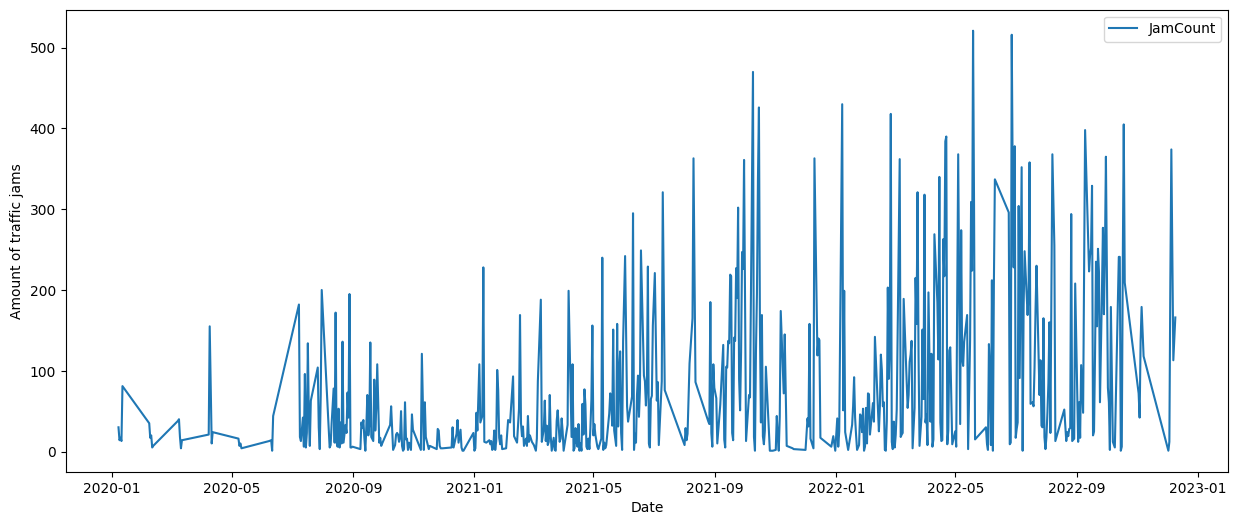

In [ ]:
ax = anwb_df_grouped.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Amount of traffic jams')
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(anwb_df_grouped,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7323.643189434953
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7068.991812802596
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7136.7448933873575
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6737.136997012074
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7007.325506899453
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6869.208058834045
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6883.401785951937
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6737.915552590912
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7164.371884727921
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6974.5761056264255
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7120.593952285735
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6705.844137962051
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6967.79415367784
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6839.383583069775
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6874.0278132822505
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6707.267718835913
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7211.555725435783
SARIMAX(0, 1, 0)x(0, 0, 1, 12

In [ ]:
mod = sm.tsa.statespace.SARIMAX(anwb_df_grouped,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9453      0.012    -81.435      0.000      -0.968      -0.923
ma.S.L12      -1.0191      0.042    -24.062      0.000      -1.102      -0.936
sigma2      8427.0180    581.374     14.495      0.000    7287.546    9566.490


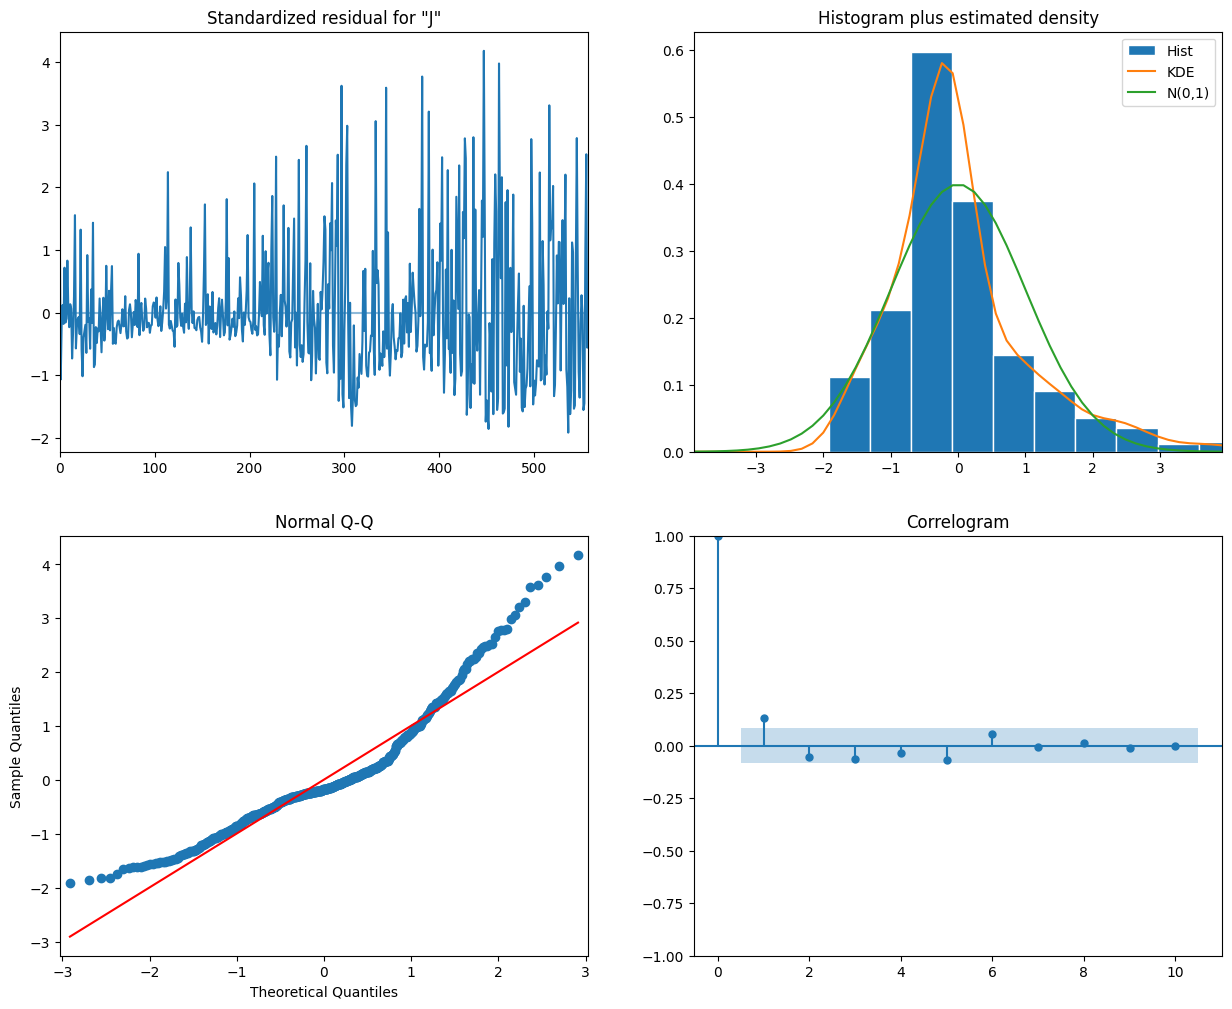

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
ax = anwb_df_grouped['2022':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Amount of traffic jams')
plt.legend()

plt.show()